In [3]:
import gym

In [4]:
!pip install pennylane

In [5]:
import numpy as np

In [6]:
a=1+1j
b=9+8j

In [7]:
x=np.array ([a,b])

In [8]:
def norm (vector):
    def coeffLength(coeff):
        return np.real(coeff*np.conj(coeff))
    def totalLength():
        sum=0
        for i in vector:
            sum=sum+coeffLength(i)
        return (sum**(0.5))
    totalsum=np.array(totalLength())
    return (vector/totalsum)

In [9]:
norm (x)

array([0.08247861+0.08247861j, 0.74230749+0.65982888j])

In [10]:
a=1+1j
b=9+8j

x=np.array([a,b])

In [11]:
norm(x)

array([0.08247861+0.08247861j, 0.74230749+0.65982888j])

In [12]:
def inner (A,B):
    return (A*np.matrix(B).getH())

In [13]:
inner (x,x)

matrix([[147.+0.j]])

In [14]:
def outer (A,B):
    return (np.outer(A,B))

In [15]:
outer(x,x)

array([[ 0.  +2.j,  1. +17.j],
       [ 1. +17.j, 17.+144.j]])

In [16]:
matrix = np.array ([[0,1,5,20],[3,0,4,15],[0,1,9,36],[1,7,0,0]])

In [17]:
vectorA= np.array([1,1j])
vectorB= np.array([1j,1])


In [18]:
def Linindp(M):
    return (M.shape[1]==np.linalg.matrix_rank(M))

In [19]:
Linindp(matrix)

True

In [20]:
def isortho(A,B):
    return (inner(A,B)==0)

In [21]:
isortho(vectorA,vectorB)

matrix([[ True]])

In [22]:
M= np.array([[1/(2)**(0.5),1/(2)**(0.5)],[1/(2)**(0.5),-1/(2)**(0.5)]])

In [23]:
def isunitary(M):
    return (np.allclose(np.eye(np.shape(M)[0]),np.matrix(M).getH()*M))

In [24]:
isunitary(M)

True

In [25]:
def tensordot(M1,M2):
    return np.kron (M1,M2)

In [26]:
tensordot(M,M)

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [27]:
!pip install qiskit

In [28]:
from qiskit import *
%matplotlib inline
from math import pi, sqrt

In [29]:
circ=QuantumCircuit(5)

In [30]:
circ.h(0)
circ.x(1)
circ.y(2)
circ.z(3)
circ.rz(pi/4,4)

In [31]:
!pip install pylatexenc

In [32]:
from pylatexenc import *

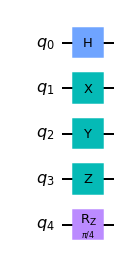

In [33]:
circ.draw('mpl')

In [34]:
backend = Aer.get_backend('statevector_simulator')
result = execute (circ,backend).result()
output=result.get_statevector(circ,decimals=3)

In [35]:
!pip install pydot
!pip install keras
!pip install graphviz



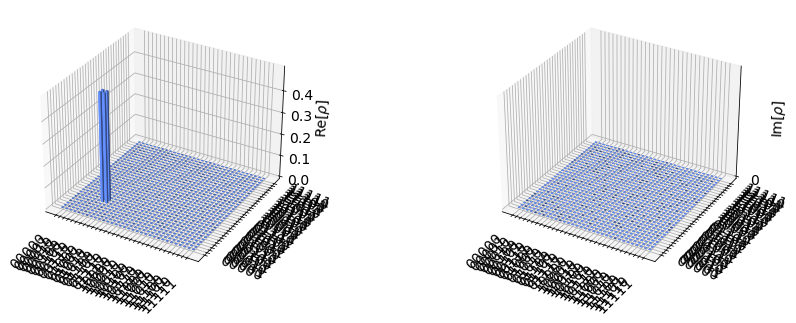

In [36]:
from qiskit import visualization
visualization.plot_state_city(output)

In [37]:
circ1=QuantumCircuit(2)

In [38]:
circ1.h(0)
circ1.x(1)
circ1.x(1)

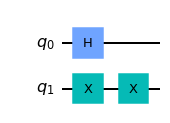

In [39]:
circ1.draw('mpl')

In [40]:
backend = Aer.get_backend('statevector_simulator')
result = execute (circ1,backend).result()
output=result.get_statevector(circ1,decimals=3)

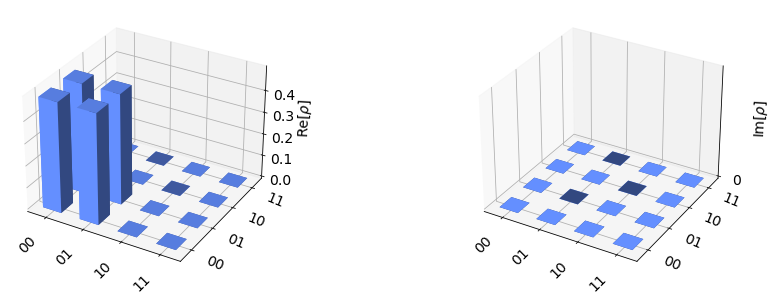

In [41]:
from qiskit import visualization
visualization.plot_state_city(output)

In [42]:
circ3=QuantumCircuit(6)

In [43]:
circ3.h(1)
circ3.x(2)
circ3.y(3)
circ3.z(4)
circ3.h(5)
circ3.rz(pi/4,5)

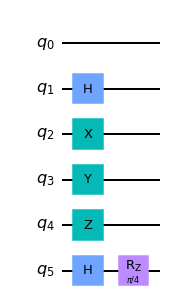

In [44]:
circ3.draw('mpl')

In [45]:
qobj=assemble(circ3)
state=backend.run(qobj).result().get_statevector()

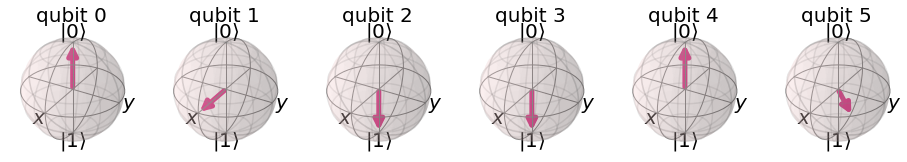

In [46]:
visualization.plot_bloch_multivector(state)

In [47]:
circ4=QuantumCircuit(6,6)

In [48]:
for i in range(0,6):
    circ4.h(i)
    circ4.measure(i,i)

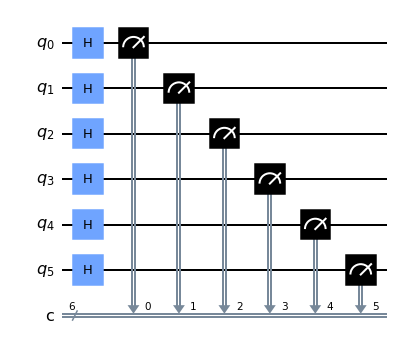

In [49]:
circ4.draw('mpl')

In [50]:
measures=[]
for jn in range (0,10):
    outcome = execute(circ4,backend).result()
    hist=outcome.get_counts()
    for i in hist.keys():
        measures.append(int(i,2))

In [51]:
measures

[51, 61, 62, 15, 30, 50, 55, 2, 8, 47]

In [52]:
M = np.array(
    [
        [47, 13, -34],
        [-41, 4, 0],
        [28, 58, 41],
    ])

In [53]:
def get_eigenvals(M):
    return np.linalg.eigvals(M)

In [54]:
get_eigenvals(M)

array([15.50432174+40.4024353j, 15.50432174-40.4024353j,
       60.99135652 +0.j       ])

In [55]:
def get_eigenvectors(M):
    w, v = np.linalg.eig(M)
    return v

In [56]:
vectors = get_eigenvectors(M)

In [57]:
vectors[:,2].reshape(3, 1)

array([[-0.70907074+0.j],
       [ 0.5101107 +0.j],
       [ 0.48683237+0.j]])

In [58]:
V = np.array(
    [
        [1/sqrt(2), 1/sqrt(2), 1/sqrt(2), 1/sqrt(2)],
    ])

In [59]:
axes = []
axes.append(np.array(
    [
        [1, 0, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 1, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 1, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 0, 1],
    ]))

In [60]:
def proj(V, axis):
    return np.dot(V, np.dot(outer(axis, axis), np.transpose(V)))

In [61]:
proj(V, axes[0])

array([[0.5]])

In [62]:
length = 0
for i in axes:
    length += proj(V, i)
length = sqrt(length)
length

1.414213562373095

In [63]:
M = np.array(
    [
        [47, 13, -34],
        [-41, 4, 0],
        [28, 58, 41],
    ])

In [64]:
def svd(M):
    return np.linalg.svd(M)

In [65]:
P, Q, R = svd(M)

In [66]:
def postQ(Q):
    Q2 = np.zeros([3, 3])
    Q2[:3, :3] = np.diag(Q)
    return Q2

In [67]:
postQ(Q)

array([[80.5396182 ,  0.        ,  0.        ],
       [ 0.        , 63.87851761,  0.        ],
       [ 0.        ,  0.        , 22.20146139]])

In [68]:
M2 = np.dot(P, np.dot(postQ(Q), R))
np.allclose(M, M2)

True

In [69]:
circB = QuantumCircuit(2, 2)

In [70]:
circB.h(0)
circB.cx(0, 1)
circB.measure(0, 0)
circB.measure(1, 1)

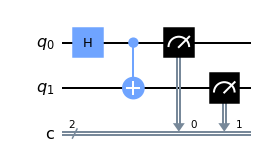

In [71]:
circB.draw('mpl')

In [72]:
measures = []
for j in range(0, 10):
    outcome = execute(circB, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measures.append(i)
measures

['11', '00', '00', '00', '11', '11', '00', '11', '11', '00']

In [73]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

In [74]:
qc.initialize([0, 0, 1, 0], qr)

In [75]:
qc.h(0)

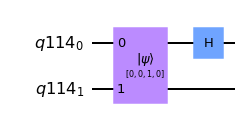

In [76]:
qc.draw('mpl')

In [77]:
#bell state
state = execute(qc, backend).result().get_statevector()
state

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [78]:
from qiskit import quantum_info

In [79]:
quantum_info.DensityMatrix(state)

DensityMatrix([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j]],
              dims=(2, 2))


In [80]:
def getDensity(quantumCircuit):
    return np.matrix(quantum_info.DensityMatrix(execute(quantumCircuit, backend).result().get_statevector()).data)

In [81]:
getDensity(qc)

matrix([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j],
        [0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j]])

In [82]:
quantum_info.partial_trace(state, [0])

DensityMatrix([[0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j]],
              dims=(2,))


In [83]:
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), [n])

In [84]:
getPTrace(qc, 0)

DensityMatrix([[0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j]],
              dims=(2,))


In [85]:
def getRx(pd):
    sigmaX = np.matrix([[0, 1], [1, 0]])
    return np.trace(pd.data*sigmaX)

In [86]:
getRx(getPTrace(qc, 1))

(1.0000000000000002+0j)

In [87]:
def getRy(pd):
    sigmaY = np.matrix([[0, -1j], [1j, 0]])
    return np.trace(pd.data*sigmaY)

In [88]:
def getRz(pd):
    sigmaZ = np.matrix([[1, 0], [0, -1]])
    return np.trace(pd.data*sigmaZ)

In [89]:
getRy(getPTrace(qc, 0))

0j

In [90]:
qreg = QuantumRegister(7)
qclas = ClassicalRegister(7)
quantumC = QuantumCircuit(qreg, qclas)
initializedState = [0 for i in range(0, 2**7)]
initializedState[107] = 1
quantumC.initialize(initializedState, qreg)

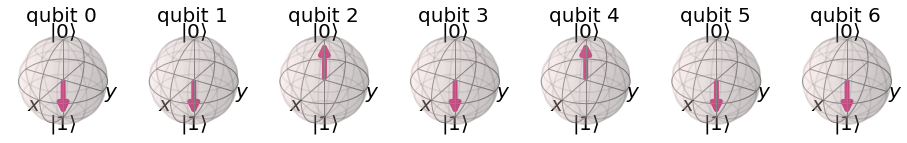

In [91]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())

In [92]:
quantumC.ccx(0, 1, 2)
quantumC.swap(3, 4)
quantumC.h(6)
quantumC.cp(pi/3, 5, 6)

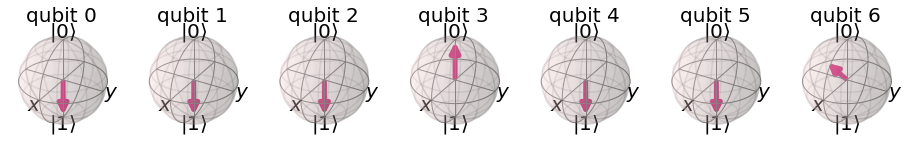

In [93]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())


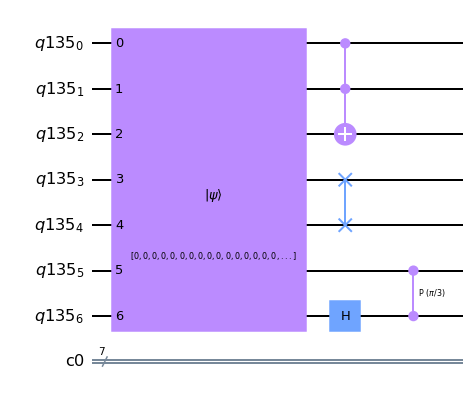

In [94]:
quantumC.draw('mpl')

In [95]:
qreg = QuantumRegister(3)
qclas = ClassicalRegister(3)
quantumC = QuantumCircuit(qreg, qclas)
initializedState = [0 for i in range(0, 2**3)]
initializedState[5] = 1
quantumC.initialize(initializedState, qreg)

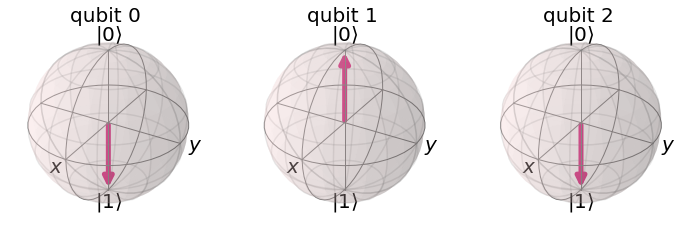

In [96]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())

In [97]:
quantumC.cswap(0, 1, 2)

quantumC.cx(1, 2)
quantumC.ccx(0, 2, 1)
quantumC.cx(1, 2)

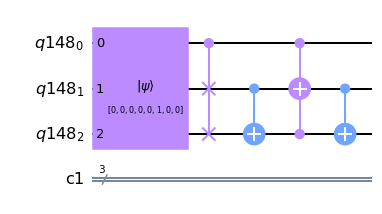

In [98]:
quantumC.draw('mpl')

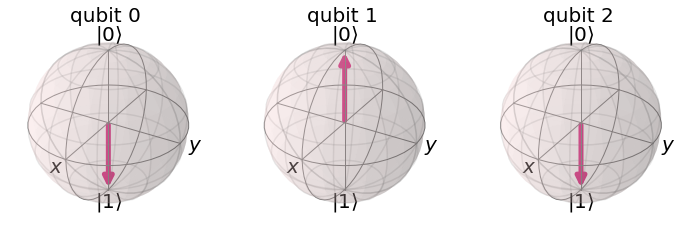

In [99]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())

In [100]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [101]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [102]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [103]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [104]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [105]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [106]:
circ = makeCirc(4, 1)
#getBloch(circ)


0000


In [107]:
circ.crx(-pi/2, 2, 3)
circ.cx(1, 2)
circ.csx(1, 3)
circ.cx(0, 2)
circ.csx(0, 3)
circ.csx(2, 3)
circ.i(1)

for i in range(0, 4):
    circ.measure(i, i)

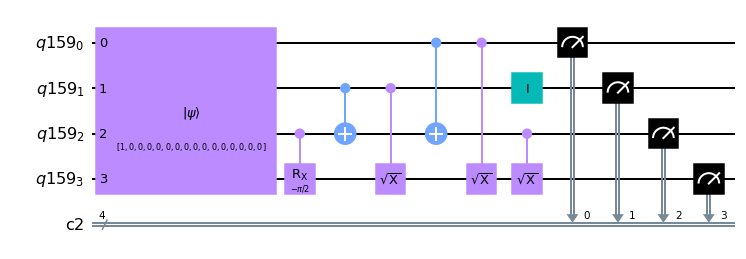

In [108]:
circ.draw('mpl')

In [109]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))


In [110]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt

In [111]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [112]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [113]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

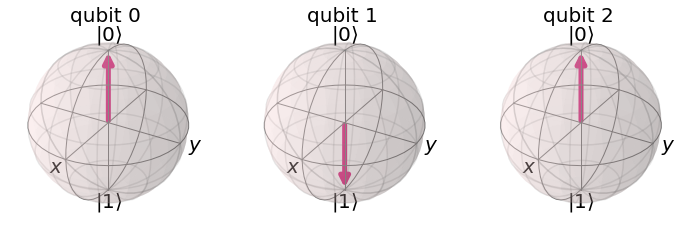

In [114]:
qr = QuantumRegister(3)
qc = ClassicalRegister(3)
circ = QuantumCircuit(qr, qc)
initializedState = stateGenerator('010')
circ.initialize(initializedState, qr)
getBloch(circ)

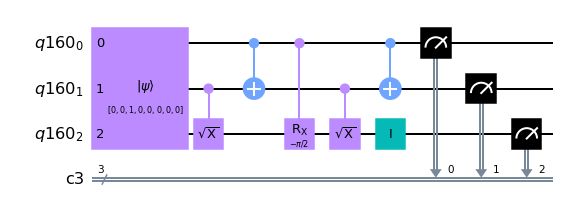

In [115]:
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)
circ.i(2)

for i in range(0, 3):
    circ.measure(i, i)
    
circ.draw('mpl')

['110']


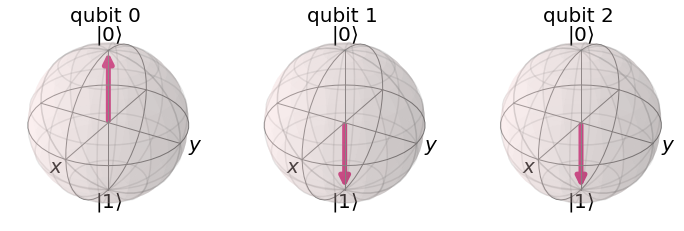

In [116]:
print(getMeasure(circ, 1))
getBloch(circ)


In [117]:
circ = QuantumCircuit(qr)
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)

In [118]:
qbsc = circ.to_gate(label=' QBSC')

In [119]:
circ2 = QuantumCircuit(7)
circ2.append(qbsc, [0, 1, 2])

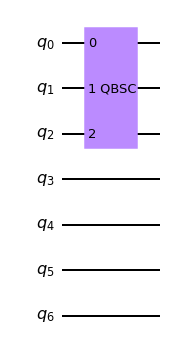

In [120]:
circ2.draw('mpl')

In [121]:
midcirc = QuantumCircuit(4)

#less than greater than
midcirc.cx(0, 2)
midcirc.crx(-pi/2, 2, 3)
midcirc.cx(1, 2)
midcirc.csx(1, 3)
midcirc.csx(2, 3)
midcirc.cx(3, 2)

#equal
midcirc.x(0)
midcirc.cx(0, 1)

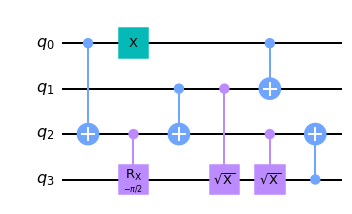

In [122]:
midcirc.draw('mpl')

In [123]:
mqc = midcirc.to_gate(label=' MQC')

In [124]:
circ2.append(mqc, [3, 4, 5, 6])

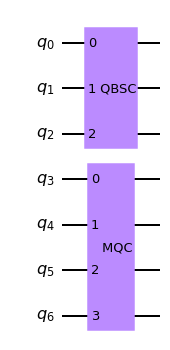

In [125]:
circ2.draw('mpl')

In [126]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [127]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [128]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [129]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [130]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [131]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [132]:
circ = makeCirc(6, 0)
#getBloch(circ)

011100


In [133]:
circ.cswap(1, 2, 3)
circ.cswap(1, 4, 5)
circ.cswap(0, 3, 5)

for i in range(2, 6):
    circ.measure(i, i)

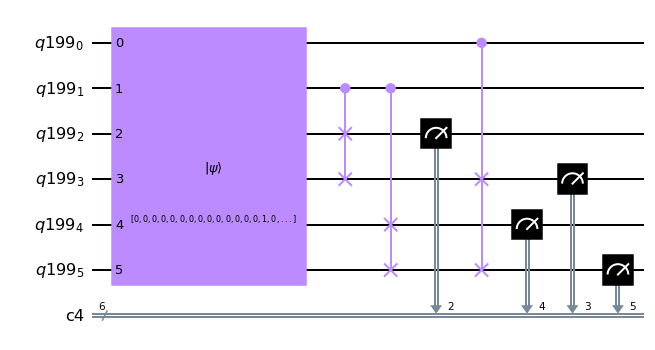

In [134]:
circ.draw('mpl')

In [135]:
getMeasure(circ, 1)[0][::-1]

'001100'

In [136]:
circ = QuantumCircuit(6)
circ.cswap(1, 2, 3)
circ.cswap(1, 4, 5)
circ.cswap(0, 3, 5)

In [137]:
mux = circ.to_gate(label=' Mux')

In [138]:
circ2 = QuantumCircuit(12)
circ2.append(mux, [0, 1, 2, 3, 4, 5])

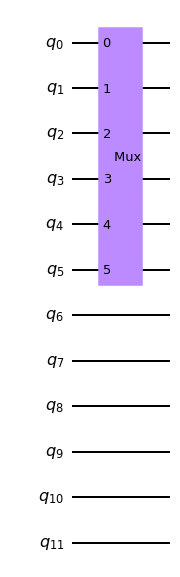

In [139]:
circ2.draw('mpl')


In [140]:
circ3 = QuantumCircuit(6)
circ3.cswap(1, 2, 3)
circ3.cswap(0, 2, 4)
circ3.cswap(0, 3, 5)

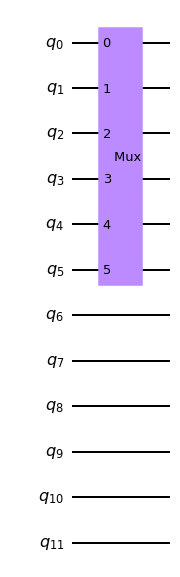

In [141]:
circ2.draw('mpl')


In [142]:
demux = circ3.to_gate(label=' Demux')

In [143]:
circ2.append(demux, [6, 7, 8, 9, 10, 11])

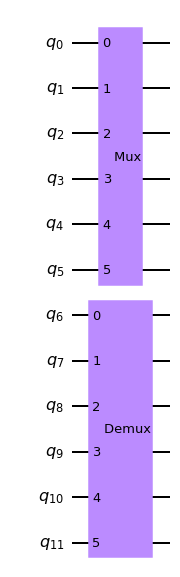

In [144]:
circ2.draw('mpl')

In [145]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [146]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [147]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [148]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [149]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [150]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [151]:
circ = makeCirc(4, 1)
#getBloch(circ)

1100


In [152]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

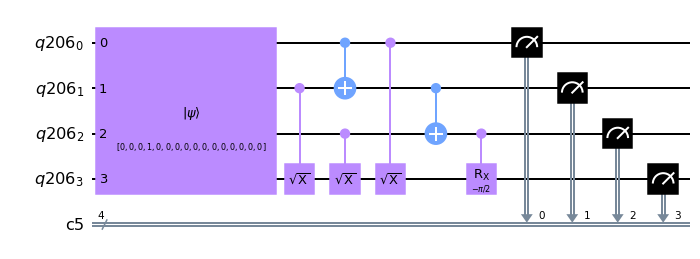

In [153]:
circ.draw('mpl')

In [154]:
getMeasure(circ, 1)[0][::-1]

'1001'

In [155]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [156]:
fullAdder = circ.to_gate(label=' Adder')

In [157]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

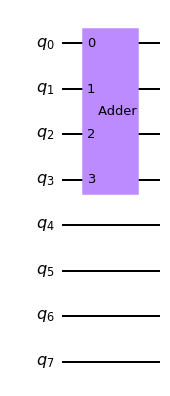

In [158]:
circ2.draw('mpl')

In [159]:
def fourAdder(a1, a2):
    qubits = len(a1) + len(a2) + 5
    qr = QuantumRegister(qubits)
    qc = ClassicalRegister(qubits)
    circuit = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(a1[::-1] + a2[::-1] + '00000')
    circuit.initialize(initializedState, qr)
    
    circuit.append(fullAdder, [0, 4, 8, 9])
    circuit.append(fullAdder, [1, 5, 9, 10])
    circuit.append(fullAdder, [2, 6, 10, 11])
    circuit.append(fullAdder, [3, 7, 11, 12])
    
    for i in range(0, qubits):
        circuit.measure(i, i)
    return circuit

In [160]:
a = '1100'
b = '0011'
#'10001'

In [161]:
circ = fourAdder(a, b)

In [162]:
getMeasure(circ, 1)[0][:5]

'01111'

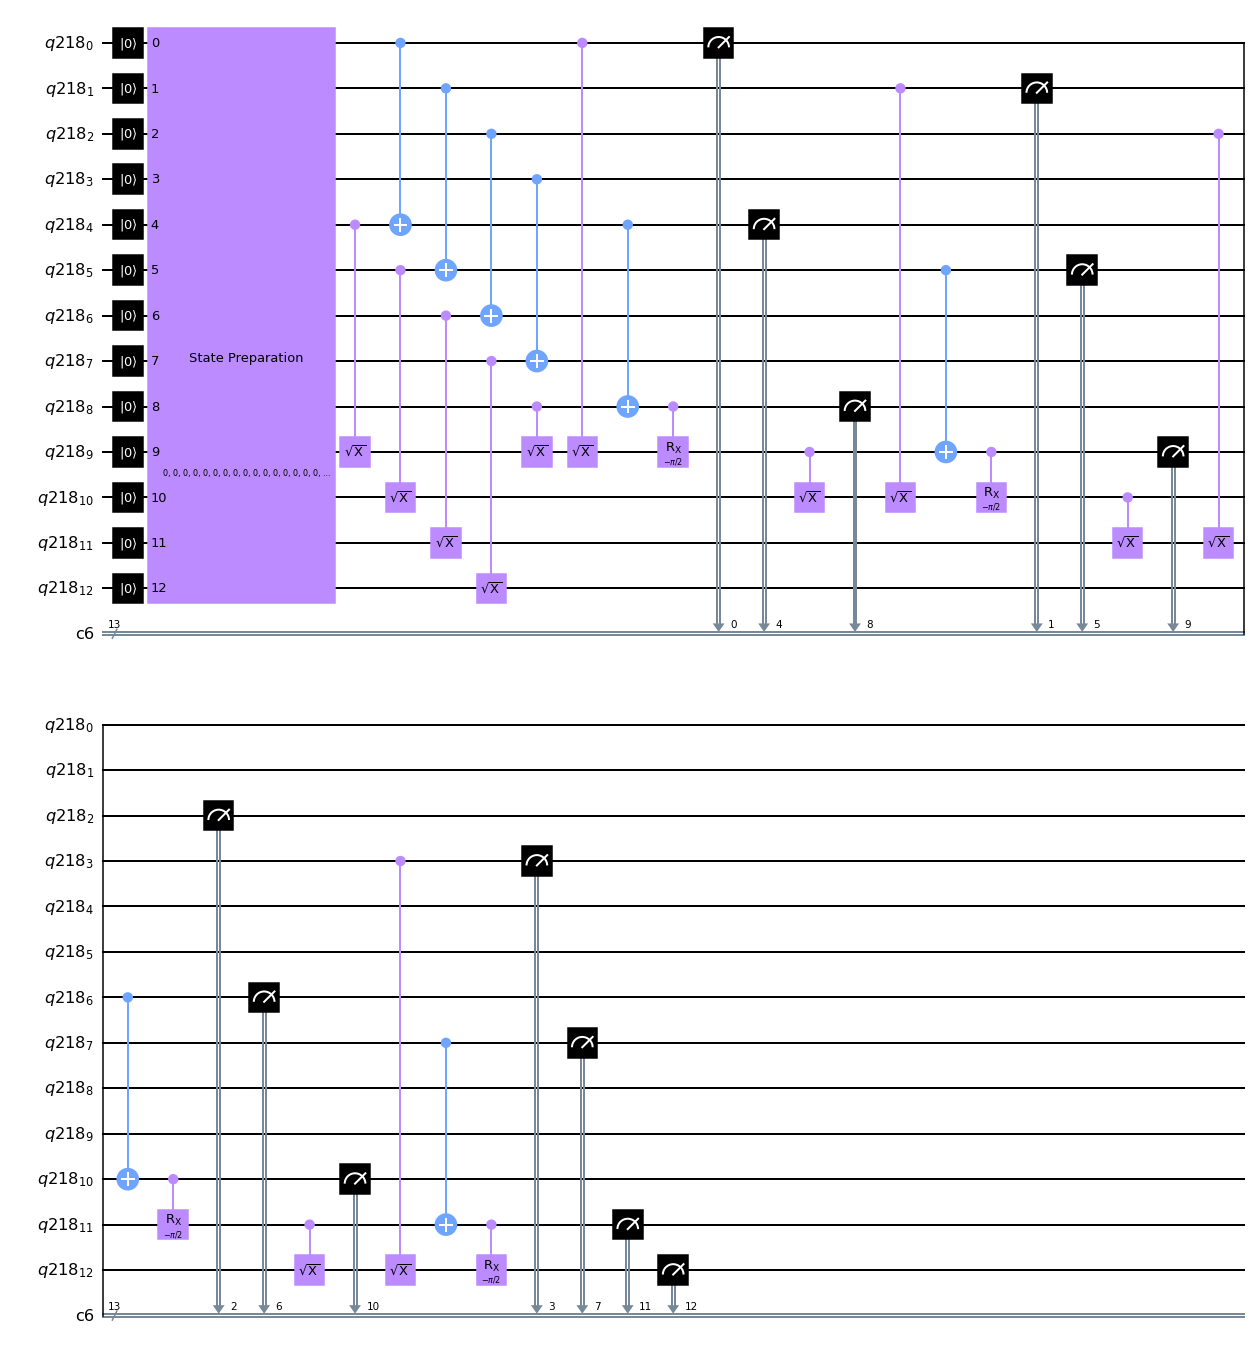

In [163]:
circ.decompose().draw('mpl')

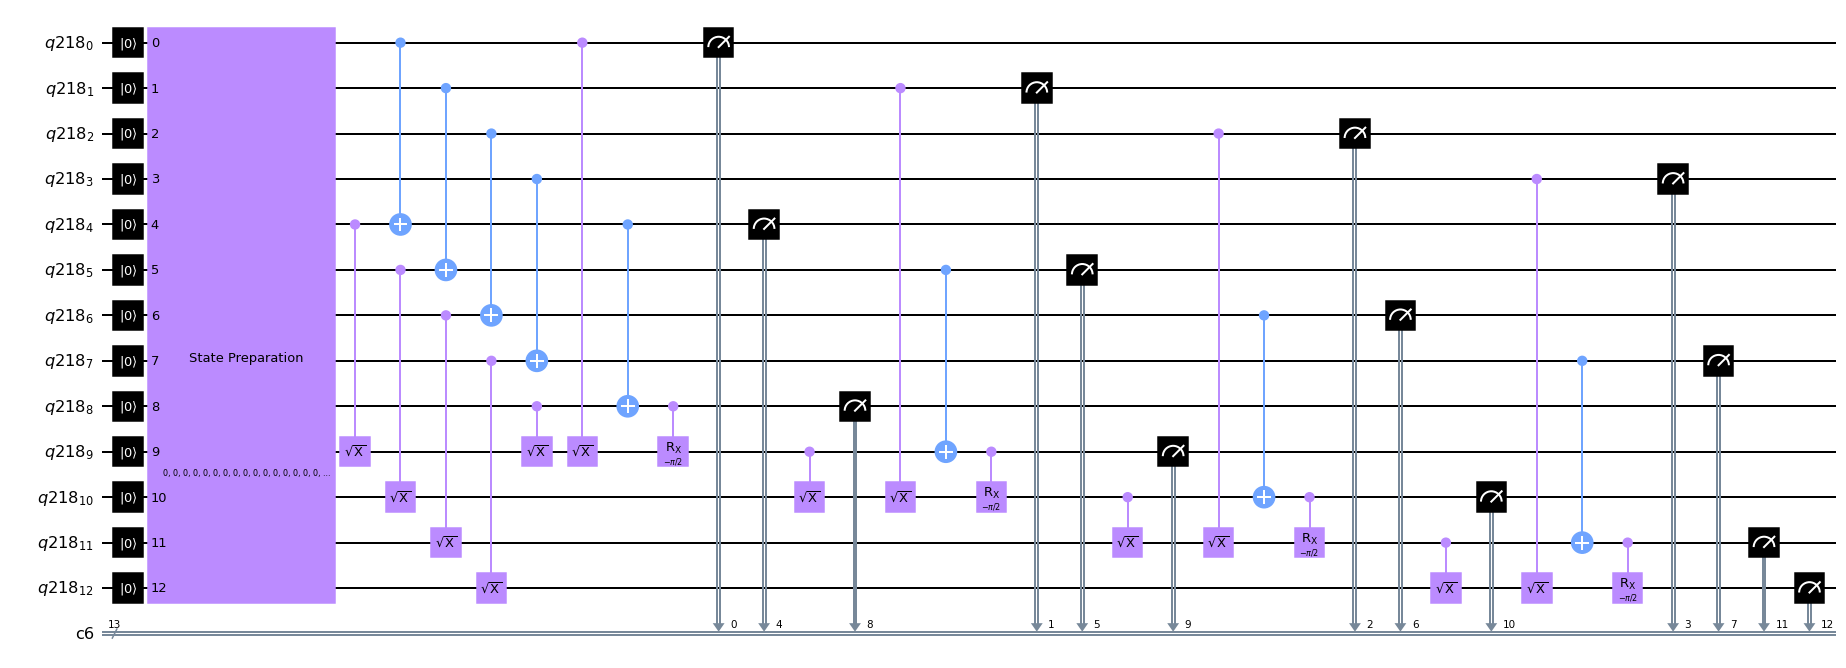

In [164]:
circ.decompose().draw('mpl', fold=-1)

In [165]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [166]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [167]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [168]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [169]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [170]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [171]:
circ = makeCirc(4, 1)
#getBloch(circ)

1110


In [172]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

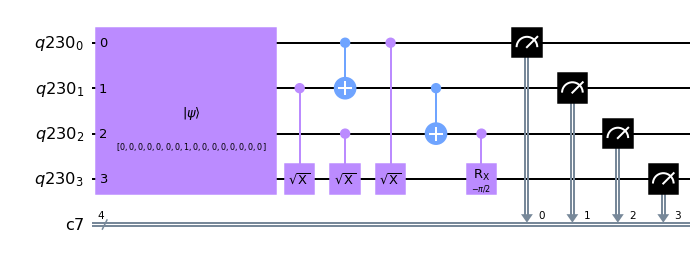

In [173]:
circ.draw('mpl')

In [174]:
getMeasure(circ, 1)[0][::-1]

'1011'

In [175]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [176]:
fullAdder = circ.to_gate(label=' Adder')

In [177]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

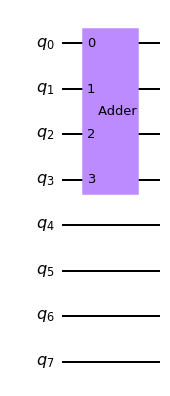

In [178]:
circ2.draw('mpl')

In [179]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [180]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [181]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [182]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [183]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [184]:
def makeCirc2(n, m, o, inp):
    initState = inp
    for i in range(0, m):
        initState += str(0)
    for i in range(0, o):
        initState += str(1)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [185]:
encoderCirc = makeCirc2(6, 0, 2, '1000')
#getBloch(circ)

100011


In [186]:
encoderCirc.x(0)
encoderCirc.x(1)
encoderCirc.x(2)
encoderCirc.ccx(0, 1, 4)
encoderCirc.ccx(0, 2, 5)

for i in range(4, 6):
    encoderCirc.measure(i, i)

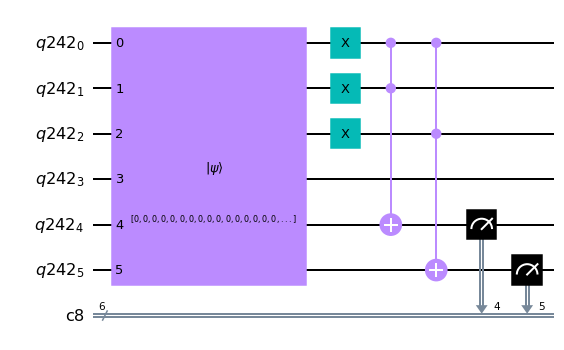

In [187]:
encoderCirc.draw('mpl')

In [188]:
getMeasure(encoderCirc, 1)[0][::-1][4:]

'11'

In [189]:
decoderCirc = makeCirc2(4, 1, 1, '10')

1001


In [190]:
decoderCirc.cx(0, 3)
decoderCirc.ccx(1, 3, 2)
decoderCirc.cx(2, 1)
decoderCirc.cx(2, 3)
decoderCirc.swap(0, 1)
decoderCirc.cx(0, 1)

for i in range(0, 4):
    decoderCirc.measure(i, i)

In [191]:
getMeasure(decoderCirc, 1)[0][::-1]

'0100'

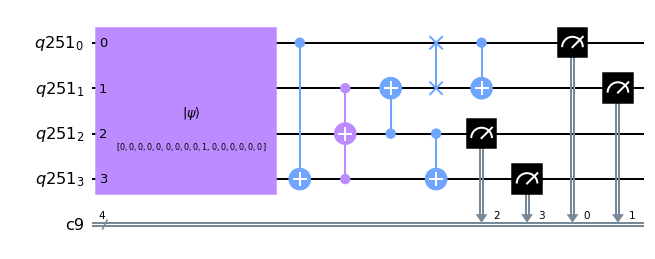

In [192]:
decoderCirc.draw('mpl')

In [193]:
encCirc = QuantumCircuit(6)
encCirc.x(0)
encCirc.x(1)
encCirc.x(2)
encCirc.ccx(0, 1, 4)
encCirc.ccx(0, 2, 5)

In [194]:
Encoder = encCirc.to_gate(label = ' Encoder')

In [195]:
decCirc = QuantumCircuit(4)
decCirc.cx(0, 3)
decCirc.ccx(1, 3, 2)
decCirc.cx(2, 1)
decCirc.cx(2, 3)
decCirc.swap(0, 1)
decCirc.cx(0, 1)

In [196]:
Decoder = decCirc.to_gate(label=' Decoder')

In [197]:
circuit = QuantumCircuit(12)
circuit.append(Encoder, [0, 1, 2, 3, 4, 5])
circuit.append(Decoder, [6, 7, 8, 9])

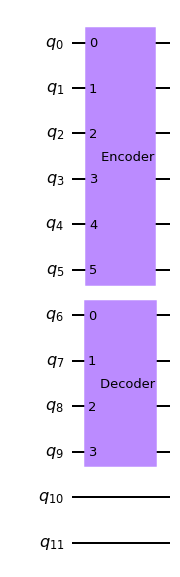

In [198]:
circuit.draw('mpl')

In [199]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [200]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [201]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [202]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [203]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [204]:
def makeCirc3(n, m, o, inp=None):
    initState = ''
    for i in range(0, o):
        initState += str(1)
    if inp != None:
        initState = inp
    else:
        for i in range(0, n-o-m):
            initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [205]:
def shifterCircuitMaker(n, inp=None):
    shifterCircuit = makeCirc3(n, 0, 1, inp)
    for i in range(0, n-2):
        shifterCircuit.cswap(0, i+1, i+2)
    for i in range(0, n-1):
        shifterCircuit.measure(i, i)
    return shifterCircuit

In [206]:
shiftCircuit = shifterCircuitMaker(12)

111110100111


In [207]:
def applyShift(circ, n):
    result = getMeasure(circ, 1)[0][::-1]
    return shifterCircuitMaker(n, result)

In [208]:
for i in range(0, 10):
    shiftCircuit = applyShift(shiftCircuit, 12)

111101001110
111010011100
110100111000
101001110000
110011100000
100111000000
101110000000
111100000000
111000000000
110000000000


In [209]:
def rotateCircuitMaker(n, inp=None):
    shifterCircuit = makeCirc3(n, 0, 1, inp)
    for i in range(0, n-2):
        shifterCircuit.cswap(0, i+1, i+2)
    for i in range(0, n):
        shifterCircuit.measure(i, i)
    return shifterCircuit
def applyRotate(circ, n):
    result = getMeasure(circ, 1)[0][::-1]
    return rotateCircuitMaker(n, result)

In [210]:
rotateCircuit = rotateCircuitMaker(12)

111001011011


In [211]:
for i in range(0, 10):
    rotateCircuit = applyRotate(rotateCircuit, 12)

110010110111
100101101111
101011011110
110110111100
101101111001
111011110010
110111100101
101111001011
111110010110
111100101101


In [212]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [213]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [214]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [215]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [216]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [217]:
def makeCirc(n, state):
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(state)
    circ.initialize(initializedState, qr)
    return circ

In [218]:
def increment(n, currentState):
    circ = makeCirc(n, currentState)
    for i in range(n-1, 0, -1):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.x(n-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

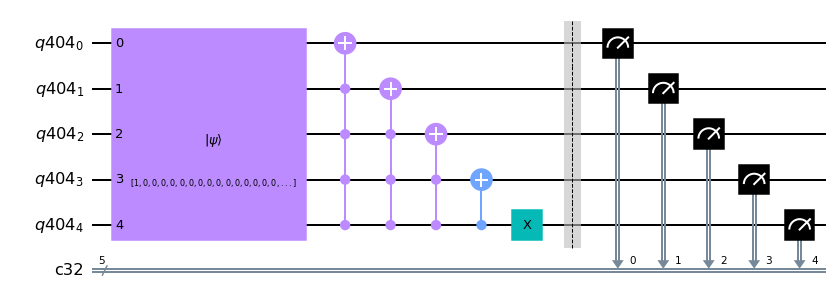

In [219]:
n = 5
circ = increment(n, '0'*n)
circ.draw('mpl')

In [220]:
def decrement(n, currentState):
    circ = makeCirc(n, currentState)
    circ.x(n-1)
    for i in range(1, n):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

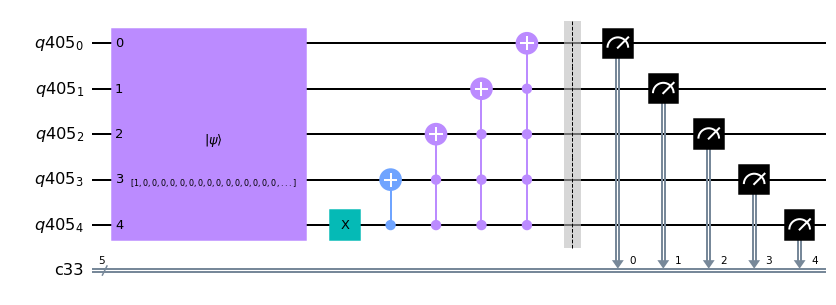

In [221]:
circ = decrement(n, '0'*n)
circ.draw('mpl', fold=-1)

In [222]:
n = 4
circ = increment(n, '0'*n)
print(getMeasure(circ, 1)[0][::-1])
for i in range(0, 17):
    circ = increment(n, getMeasure(circ, 1)[0][::-1])
    print(getMeasure(circ, 1)[0][::-1])

0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111
0000
0001
0010


In [223]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))


In [224]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [225]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [226]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [227]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [228]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

1101


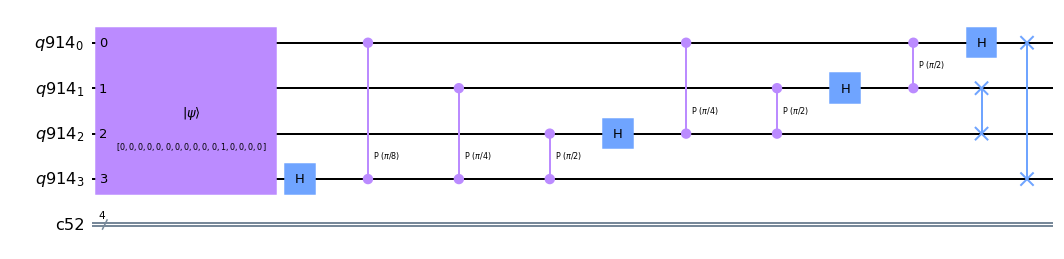

In [229]:
# Let's see how it looks:
qc = makeCirc(4, 0)
qft(qc,4)
qc.draw('mpl')

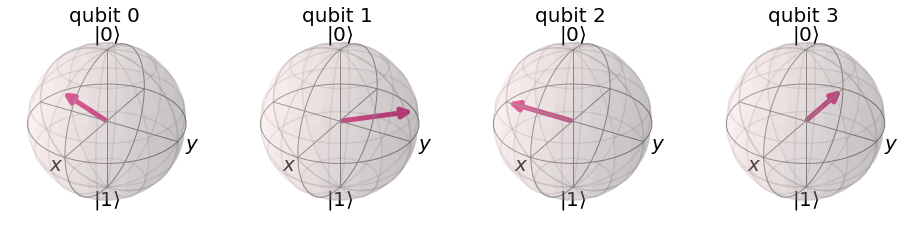

In [230]:
#QFT(ABCD) -> DCBA (swap) ABCD

getBloch(qc)

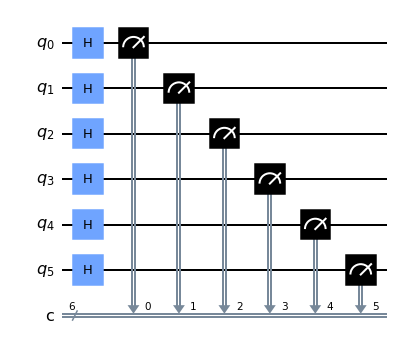

In [231]:
circ3 = QuantumCircuit(6, 6)
for i in range(0, 6):
    circ3.h(i)
    circ3.measure(i, i)
circ3.draw('mpl')


In [232]:
measures = []
for j in range(0, 10):
    outcome = execute(circ3, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measures.append(int(i, 2))

In [233]:
measures


[32, 20, 62, 46, 11, 18, 46, 43, 54, 39]

In [234]:
encoderCirc.x(0)
encoderCirc.x(1)
encoderCirc.x(2)
encoderCirc.ccx(0, 1, 4)
encoderCirc.ccx(0, 2, 5)

for i in range(4, 6):
    encoderCirc.measure(i, i)

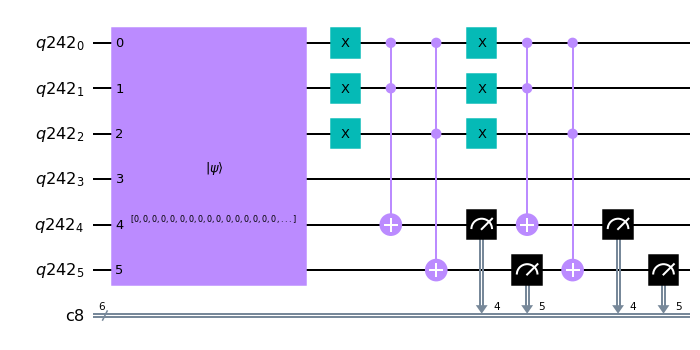

In [235]:
encoderCirc.draw('mpl')

In [236]:
getMeasure(encoderCirc, 1)[0][::-1][4:]

'11'

In [237]:
decoderCirc = makeCirc2(4, 1, 1, '10')

1001


In [238]:
decoderCirc.cx(0, 3)
decoderCirc.ccx(1, 3, 2)
decoderCirc.cx(2, 1)
decoderCirc.cx(2, 3)
decoderCirc.swap(0, 1)
decoderCirc.cx(0, 1)

for i in range(0, 4):
    decoderCirc.measure(i, i)

In [239]:
getMeasure(decoderCirc, 1)[0][::-1]

'0100'

In [240]:
encCirc = QuantumCircuit(6)
encCirc.x(0)
encCirc.x(1)
encCirc.x(2)
encCirc.ccx(0, 1, 4)
encCirc.ccx(0, 2, 5)

In [241]:
Encoder = encCirc.to_gate(label = ' Encoder')

In [242]:
decCirc = QuantumCircuit(4)
decCirc.cx(0, 3)
decCirc.ccx(1, 3, 2)
decCirc.cx(2, 1)
decCirc.cx(2, 3)
decCirc.swap(0, 1)
decCirc.cx(0, 1)

In [243]:
Decoder = decCirc.to_gate(label=' Decoder')

In [244]:
circuit = QuantumCircuit(12)
circuit.append(Encoder, [0, 1, 2, 3, 4, 5])
circuit.append(Decoder, [6, 7, 8, 9])

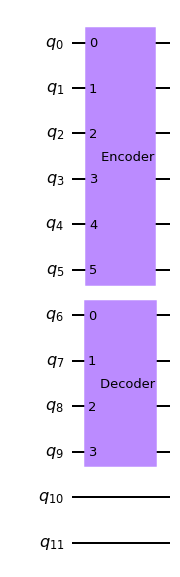

In [245]:
circuit.draw('mpl')

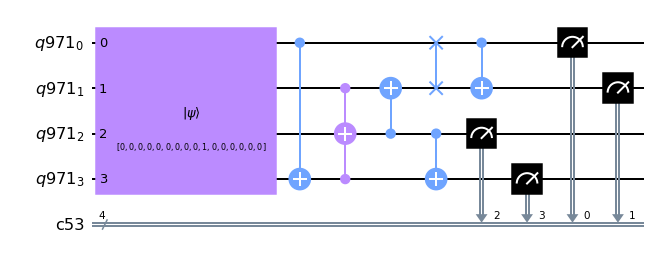

In [246]:
decoderCirc.draw('mpl')

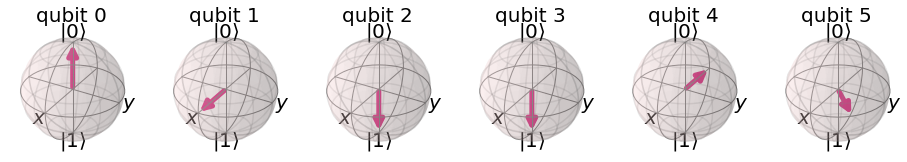

In [247]:
import numpy as np
a = 1 + 1j
b = 1 - 1j
x = np.array([a, b])
def normalize(vector):
    def coeffLength(coeff):
        return np.real(coeff*np.conj(coeff))
    def totalLength():
        sum = 0
        for i in vector:
            sum += coeffLength(i)
        return sum**(0.5)
    totalSum = np.array(totalLength())
    return vector/totalSum
normalize(x)
#inner product, #outerproduct
def inner(A, B):
    return A*np.matrix(B).getH()
inner(x, x)
def outer(A, B):
    return np.outer(A, B)
outer(x, x)
#linearly indep orthogonal
matrix = np.array(
    [
        [0, 1 ,5 ,20],
        [3, 0, 4, 15],
        [0, 1, 9, 36],
        [1, 7, 0, 0]
    ])
vectorA = np.array([1, 1j])
vectorB = np.array([1j, 1])
def isLinIndep(M):
    return (M.shape[1] == np.linalg.matrix_rank(M))
isLinIndep(matrix)
def isOrtho(A, B):
    return (inner(A, B) == 0)
isOrtho(vectorA, vectorB)
#unitary, kroneckor product
M = np.array(
    [
        [1/sqrt(2), 1/sqrt(2)],
        [1/sqrt(2), -1/sqrt(2)],
    ])
def isUnitary(M):
    return np.allclose(np.eye(M.shape[0]), np.matrix(M).getH()*M)
isUnitary(M)
np.outer(M, M)
def tensordot(A, B):
    return np.kron(A, B)
tensordot(M, M)
from qiskit import *
%matplotlib inline
from math import pi, sqrt
circ = QuantumCircuit(2)
circ.h(0)
circ.draw('mpl')
backend = Aer.get_backend('statevector_simulator')
result = execute(circ, backend).result()
output = result.get_statevector(circ, decimals=3)
visualization.plot_state_city(output)
circ2 = QuantumCircuit(6)
circ2.h(1)
circ2.x(2)
circ2.y(3)
circ2.h(4)
circ2.z(4)
circ2.h(5)
circ2.rz(pi/4, 5)
circ2.draw('mpl')
qobj = assemble(circ2)
state = backend.run(qobj).result().get_statevector()
visualization.plot_bloch_multivector(state)




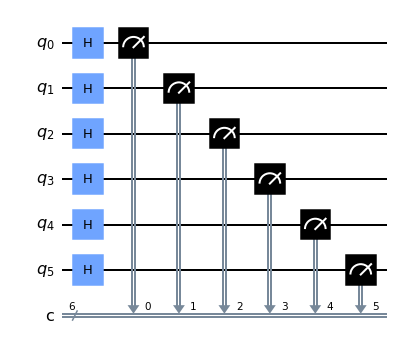

In [248]:
#Random Number Generator from 1 to 64
circ3 = QuantumCircuit(6, 6)
for i in range(0, 6):
    circ3.h(i)
    circ3.measure(i, i)
circ3.draw('mpl')

In [249]:
measures = []
for j in range(0, 10):
    outcome = execute(circ3, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measures.append(int(i, 2))
measures
#eigenvalues, eigenvectors
M = np.array(
    [
        [47, 13, -34],
        [-41, 4, 0],
        [28, 58, 41],
    ])
def get_eigenvals(M):
    return np.linalg.eigvals(M)
get_eigenvals(M)
def get_eigenvectors(M):
    w, v = np.linalg.eig(M)
    return v
vectors = get_eigenvectors(M)
vectors[:,2].reshape(3, 1)
#projection, svd
P, Q, R = np.linalg.svd(M)
print(P, Q, R)
smat = np.zeros((3, 3), dtype=complex)
smat[:3, :3] = np.diag(Q)
S = np.dot(P, np.dot(smat, R))
np.allclose(M, S)
V = np.array(
    [
        [1/sqrt(2), 1/sqrt(2), 1/sqrt(2), 1/sqrt(2)],
    ])
axes = []
axes.append(np.array(
    [
        [1, 0, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 1, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 1, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 0, 1],
    ]))
def proj(V, axis):
    return np.dot(V, np.dot(outer(axis, axis), np.transpose(V)))
proj(V, axes[0])
length = 0
for i in axes:
    length += proj(V, i)
length = sqrt(length)
length


[[-0.40028126  0.76157093 -0.50969073]
 [ 0.32086132 -0.40451093 -0.85639881]
 [-0.85838391 -0.50634043 -0.08244051]] [80.5396182  63.87851761 22.20146139] [[-0.69535073 -0.66683303 -0.26799453]
 [ 0.59802968 -0.33008541 -0.73034521]
 [ 0.39855722 -0.66811476  0.62831108]]


1.414213562373095

In [250]:
! pip install jupyterthemes 

In [251]:
!jt -t chesterish

In [252]:
measures = []
for j in range(0, 10):
    outcome = execute(circ3, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measures.append(int(i, 2))

In [253]:
measures

[29, 4, 24, 6, 16, 50, 61, 29, 42, 10]

In [254]:
M = np.array(
    [
        [47, 13, -34],
        [-41, 4, 0],
        [28, 58, 41],
    ])

In [255]:
def get_eigenvals(M):
    return np.linalg.eigvals(M)

In [256]:
get_eigenvals(M)

array([15.50432174+40.4024353j, 15.50432174-40.4024353j,
       60.99135652 +0.j       ])

In [257]:
def get_eigenvectors(M):
    w, v = np.linalg.eig(M)
    return v

In [258]:
vectors = get_eigenvectors(M)

In [259]:
vectors[:,2].reshape(3, 1)

array([[-0.70907074+0.j],
       [ 0.5101107 +0.j],
       [ 0.48683237+0.j]])

In [260]:
#projection, svd
V = np.array(
    [
        [1/sqrt(2), 1/sqrt(2), 1/sqrt(2), 1/sqrt(2)],
    ])

In [261]:
axes = []
axes.append(np.array(
    [
        [1, 0, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 1, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 1, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 0, 1],
    ]))

In [262]:
def proj(V, axis):
    return np.dot(V, np.dot(outer(axis, axis), np.transpose(V)))

In [263]:
proj(V, axes[0])

array([[0.5]])

In [264]:
length = 0
for i in axes:
    length += proj(V, i)
length = sqrt(length)

In [265]:
length

1.414213562373095

In [266]:
M = np.array(
    [
        [47, 13, -34],
        [-41, 4, 0],
        [28, 58, 41],
    ])

In [267]:
def svd(M):
    return np.linalg.svd(M)

In [268]:
P, Q, R = svd(M)

In [269]:
def postQ(Q):
    Q2 = np.zeros([3, 3])
    Q2[:3, :3] = np.diag(Q)
    return Q2

In [270]:
postQ(Q)

array([[80.5396182 ,  0.        ,  0.        ],
       [ 0.        , 63.87851761,  0.        ],
       [ 0.        ,  0.        , 22.20146139]])

In [271]:
M2 = np.dot(P, np.dot(postQ(Q), R))

In [272]:
np.allclose(M, M2)

True

In [273]:
#bellstate
circB = QuantumCircuit(2, 2)

In [274]:
circB.h(0)
circB.cx(0, 1)
circB.measure(0, 0)
circB.measure(1, 1)

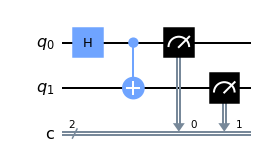

In [275]:
circB.draw('mpl')

In [276]:
measures = []
for j in range(0, 10):
    outcome = execute(circB, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measures.append(i)
measures

['11', '11', '11', '00', '11', '11', '11', '11', '00', '11']

In [277]:
#density matrix 
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

In [278]:
qc.initialize([0, 0, 1, 0], qr)

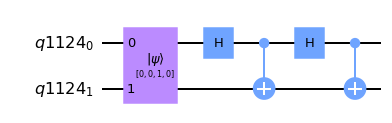

In [280]:
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [281]:
#bell state
state = execute(qc, backend).result().get_statevector()

In [282]:
state

Statevector([ 0.5-6.123234e-17j,  0.5+0.000000e+00j,  0.5+0.000000e+00j,
             -0.5+6.123234e-17j],
            dims=(2, 2))


In [283]:
state

Statevector([ 0.5-6.123234e-17j,  0.5+0.000000e+00j,  0.5+0.000000e+00j,
             -0.5+6.123234e-17j],
            dims=(2, 2))


In [284]:
quantum_info.DensityMatrix(state)

DensityMatrix([[ 0.25+0.000000e+00j,  0.25-3.061617e-17j,
                 0.25-3.061617e-17j, -0.25+0.000000e+00j],
               [ 0.25+3.061617e-17j,  0.25+0.000000e+00j,
                 0.25+0.000000e+00j, -0.25-3.061617e-17j],
               [ 0.25+3.061617e-17j,  0.25+0.000000e+00j,
                 0.25+0.000000e+00j, -0.25-3.061617e-17j],
               [-0.25+0.000000e+00j, -0.25+3.061617e-17j,
                -0.25+3.061617e-17j,  0.25+0.000000e+00j]],
              dims=(2, 2))


In [285]:
def getDensity(quantumCircuit):
    return np.matrix(quantum_info.DensityMatrix(execute(quantumCircuit, backend).result().get_statevector()).data)

In [286]:
getDensity(qc)

matrix([[ 0.25+0.000000e+00j,  0.25-3.061617e-17j,  0.25-3.061617e-17j,
         -0.25+0.000000e+00j],
        [ 0.25+3.061617e-17j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
         -0.25-3.061617e-17j],
        [ 0.25+3.061617e-17j,  0.25+0.000000e+00j,  0.25+0.000000e+00j,
         -0.25-3.061617e-17j],
        [-0.25+0.000000e+00j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
          0.25+0.000000e+00j]])

In [287]:
#partial trace, components of the bloch vector
quantum_info.partial_trace(state, [0])
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), [n])

In [288]:
getPTrace(qc, 0)

DensityMatrix([[0.5+6.35179545e-34j, 0. -6.12323400e-17j],
               [0. +6.12323400e-17j, 0.5+6.35179545e-34j]],
              dims=(2,))


In [289]:
def getRx(pd):
    sigmaX = np.matrix([[0, 1], [1, 0]])
    return np.trace(pd.data*sigmaX)

In [290]:
getRx(getPTrace(qc, 1))

0j

In [291]:
def getRy(pd):
    sigmaY = np.matrix([[0, -1j], [1j, 0]])
    return np.trace(pd.data*sigmaY)

In [292]:
def getRz(pd):
    sigmaZ = np.matrix([[1, 0], [0, -1]])
    return np.trace(pd.data*sigmaZ)

In [293]:
getRy(getPTrace(qc, 0))

(1.2246467991473537e-16+0j)

In [294]:
def getRx(pd):
    sigmaX = np.matrix([[0, 1], [1, 0]])
    return np.trace(pd.data*sigmaX)

In [295]:
getRx(getPTrace(qc, 1))

0j

In [296]:
def getRy(pd):
    sigmaY = np.matrix([[0, -1j], [1j, 0]])
    return np.trace(pd.data*sigmaY)

In [297]:
def getRz(pd):
    sigmaZ = np.matrix([[1, 0], [0, -1]])
    return np.trace(pd.data*sigmaZ)

In [298]:
getRy(getPTrace(qc, 0))

(1.2246467991473537e-16+0j)

In [299]:
#toffoli, swap, shift

In [300]:
qreg = QuantumRegister(7)
qclas = ClassicalRegister(7)
quantumC = QuantumCircuit(qreg, qclas)
initializedState = [0 for i in range(0, 2**7)]
initializedState[107] = 1
quantumC.initialize(initializedState, qreg)

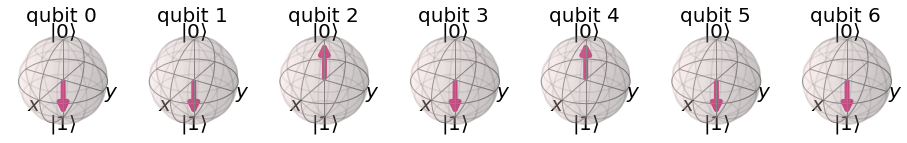

In [301]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())

In [302]:
quantumC.ccx(0, 1, 2)
quantumC.swap(3, 4)
quantumC.h(6)
quantumC.cp(pi/3, 5, 6)

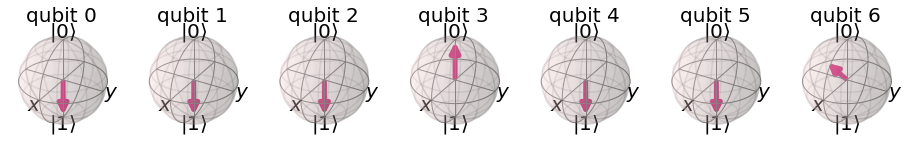

In [303]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())

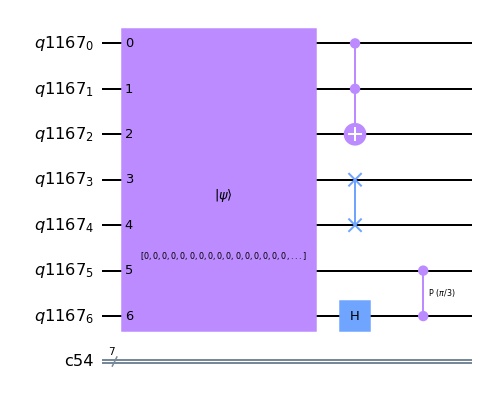

In [304]:
quantumC.draw('mpl')

In [305]:
#fredkin gate
qreg = QuantumRegister(3)
qclas = ClassicalRegister(3)
quantumC = QuantumCircuit(qreg, qclas)
initializedState = [0 for i in range(0, 2**3)]
initializedState[5] = 1
quantumC.initialize(initializedState, qreg)

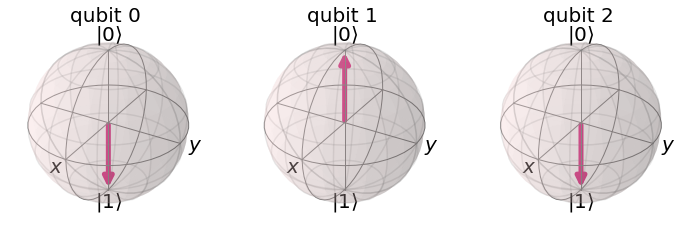

In [306]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())

In [307]:
quantumC.cswap(0, 1, 2)

quantumC.cx(1, 2)
quantumC.ccx(0, 2, 1)
quantumC.cx(1, 2)

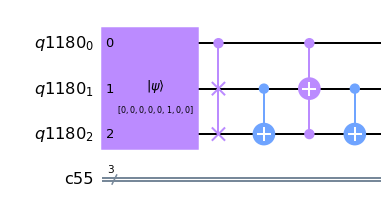

In [308]:
quantumC.draw('mpl')

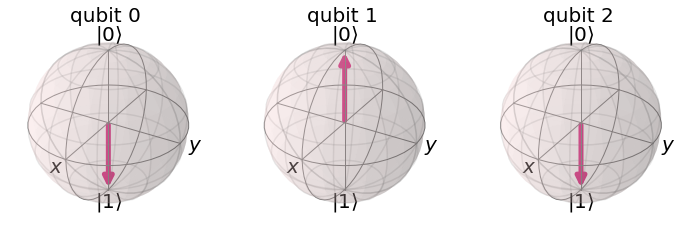

In [309]:
visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())